In [1]:
# Final Project - Stock Market Simulation - Garrett Allen

In [2]:
# Garrett Allen
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
from scipy.special import binom
from numpy import random
from scipy.stats import norm
import math
from scipy.stats import stats
from scipy.special import beta
from scipy.signal import convolve
from mpl_toolkits import mplot3d
from numpy.random import default_rng
rand = default_rng().random
from scipy.integrate import odeint

In [3]:
# Changes
Normal_Up =     1 + (2.5 / 100)
Normal_Down =   1 - (2.2 / 100)
Large_Up =      1 + (4 / 100)
Large_Down =    1 - (6.2 / 100)
Crash =         1 - (30 / 100)

# Occurences
wNormal_Up =     1 / 2.2
wNormal_Down =   1 / 2.7
wLarge_Up =      1 / 14
wLarge_Down =    1 / 12
wCrash =         1 / 365

check = wNormal_Up+wNormal_Down+wLarge_Up+wLarge_Down+wCrash
print("Percent of Days that the Market will move = ",check*100,"%")

#Sections
sc = wCrash
sld = wCrash + wLarge_Down
slu = sld + wLarge_Up
snd = slu + wNormal_Down
snu = snd + wNormal_Up

Percent of Days that the Market will move =  98.24174557051268 %


In [4]:
# Average Market Trend Over a Year
average_change = ((-(1-Crash)) * wCrash) + ((-(1-Large_Down)) * wLarge_Down) + ((-(1-Large_Up)) * wLarge_Up) + ((-(1-Normal_Down)) * wNormal_Down) + ((-(1-Normal_Up)) * wNormal_Up)
print("Average Market Change Over a Year = ",average_change*100000,"%")

Average Market Change Over a Year =  8.40465977451771 %


In [133]:
Start_Value = 100    #Price that the market will start at
days = 100           #How many days after day 0 that the market will run for 
bank = 500           #How much total money you can invest


value = Start_Value
market = [Start_Value]
day_change = [0]
for i in range(days):
    rng = random.uniform(0,1)
    #print(rng)
    
    x = 1
    if rng < sc:
        x = Crash
    elif rng > sc and rng < sld:
        x = Large_Down
    elif rng > sld and rng < slu:
        x = Large_Up
    elif rng > slu and rng < snd:
        x = Normal_Down
    elif rng > snd and rng < snu:
        x = Normal_Up
    else:
        x = 1
    
    #print(x)
    day_change = np.append(day_change,x)
    value = value * x
    
    market = np.append(market,value)

#print(market)

X = np.linspace(0,days,days+1)

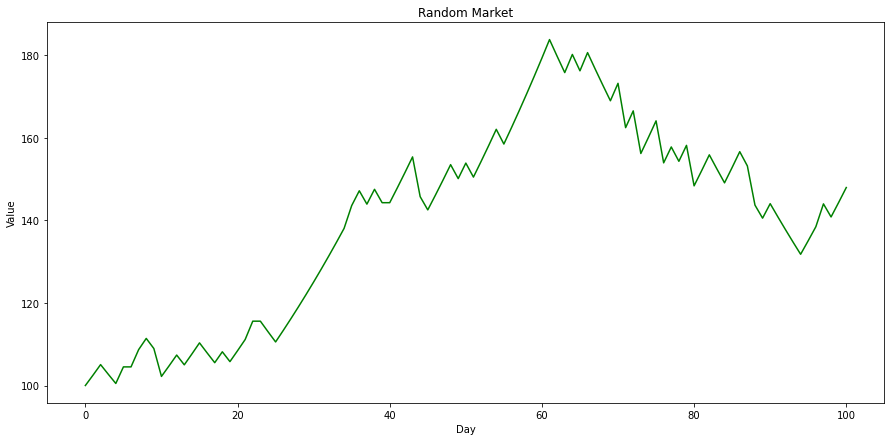

In [134]:
plot = plt.plot(X,market,'g-')
plt.title('Random Market')
plt.ylabel('Value')
plt.xlabel('Day')
plt.gcf().set_size_inches(15, 7)


In [135]:
#print(market)
#print(day_change)

In [136]:
# Investing All Day 1
invest = np.zeros((days+1,), dtype=int)
invest[1] = bank

#print(invest)

invest_value = 0
ivk = []

for j in range (days+1):
    invest_value = (invest[j] + invest_value) * day_change[j]
    ivk = np.append(ivk,invest_value)
    
#print(ivk)


In [137]:
# Investing Linear
invest2 = np.zeros((days+1,), dtype=int)

for k in range (days):
    invest2[k+1] = bank / days


#print(invest2)

invest_value2 = 0
ivk2 = []

for j in range (days+1):
    invest_value2 = (invest2[j] + invest_value2) * day_change[j]
    ivk2 = np.append(ivk2,invest_value2)

#print(ivk2)


In [138]:
# Investing Fast (Log?)
invest3 = np.zeros((days+1,), dtype=int)

banc = bank

for k in range (days):
    invest3[k+1] = banc / 10
    newbanc = banc - (banc / 10)
    banc = newbanc

#print(invest3)

invest_value3 = 0
ivk3 = []

for j in range (days+1):
    invest_value3 = (invest3[j] + invest_value3) * day_change[j]
    ivk3 = np.append(ivk3,invest_value3)

#print(ivk3)


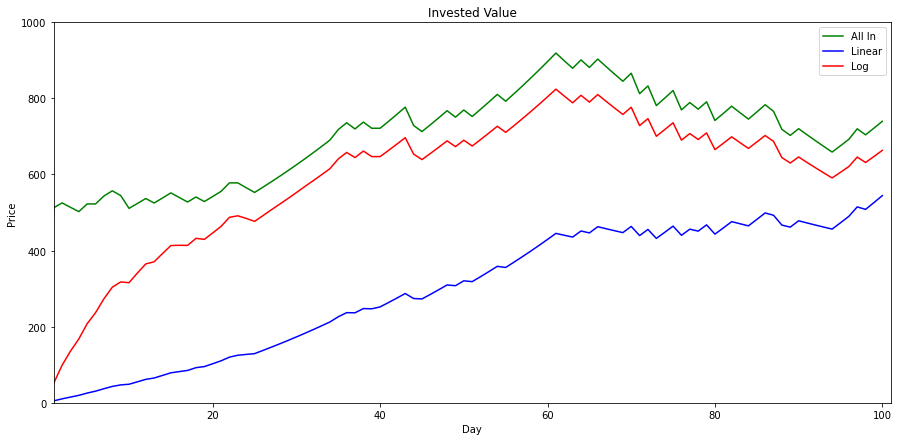

In [139]:
# Plots
plt.plot(X,ivk,'g',label = "All In")
plt.plot(X,ivk2,'b', label = "Linear")
plt.plot(X,ivk3,'r', label = "Log")
plt.title('Invested Value')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend(loc="upper right")

lowlimitx = 1
highlimitx = days + 1
lowlimity = 0
highlimity = bank * 2


plt.xlim(lowlimitx,highlimitx)
plt.ylim(lowlimity,highlimity)
plt.gcf().set_size_inches(15, 7)

In [140]:
print("All In Final Value = ",ivk[-1])
print("Linear Final Value = ",ivk2[-1])
print("Log Final Value = ",ivk3[-1])

All In Final Value =  739.8604274615348
Linear Final Value =  544.4621244462045
Log Final Value =  663.4798078488027


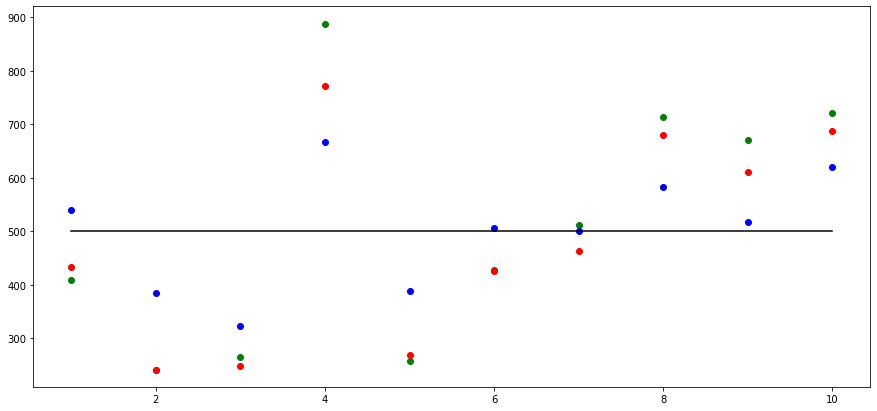

In [141]:
# Data:
allin = np.array([410,242,266,888,257,428,512,713,670,721])
lin = np.array([539,385,324,666,388,507,500,582,518,621])
log = np.array([434,242,249,772,269,426,464,679,610,687])

cycle = np.linspace(1,10,10)
breakeven = array=np.ones(10)*500

plt.plot(cycle,allin,'go')
plt.plot(cycle,lin,'bo')
plt.plot(cycle,log,'ro')
plt.plot(cycle,breakeven,'k-')
plt.gcf().set_size_inches(15, 7)